1. ¿Superhéroe o Villano?
Problema: Clasifica si un nuevo personaje es superhéroe o villano usando CART (Gini) e ID3 (Entropía).
Preguntas: ¿Cuál es el mejor atributo para la raíz? ¿Cómo cambia el árbol si añades a "Wonder Woman" (Sí, Sí, Alta, Superhéroe)?


In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

In [9]:
#Datos
personaje= ['Superman', 'Batman', 'Spiderman', 'Lex Luthor', 'Joker', 'Magneto']
vuela= ['Sí', 'No', 'No', 'No', 'No', 'No']
superpoderes=['Sí', 'No', 'Sí', 'No', 'No', 'Sí']
altura= ['Alta', 'Alta', 'Media', 'Alta', 'Media', 'Media']
clase=['Superhéroe', 'Superhéroe', 'Superhéroe', 'Villano', 'Villano', 'Villano']

#Codificamos las variables categoricas
le_vuela = LabelEncoder()
vuela_c = le_vuela.fit_transform(vuela)
le_superpoderes = LabelEncoder()
superpoderes_c = le_superpoderes.fit_transform(superpoderes)
le_altura = LabelEncoder()
altura_c = le_altura.fit_transform(altura)
le_clase = LabelEncoder()
clase_c = le_clase.fit_transform(clase)


In [15]:
#Generamos datos para el modelo
X = np.array(list(zip(vuela_c, superpoderes_c, altura_c)))
y=clase_c

In [16]:
#Arbol cart utilizando GINI
arbol_gini= DecisionTreeClassifier(criterion='gini',random_state=42)
arbol_gini.fit(X,y)

#Arbol ID3 utilizando entropía
arbol_entropia=DecisionTreeClassifier(criterion='entropy',random_state=42)
arbol_entropia.fit(X,y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

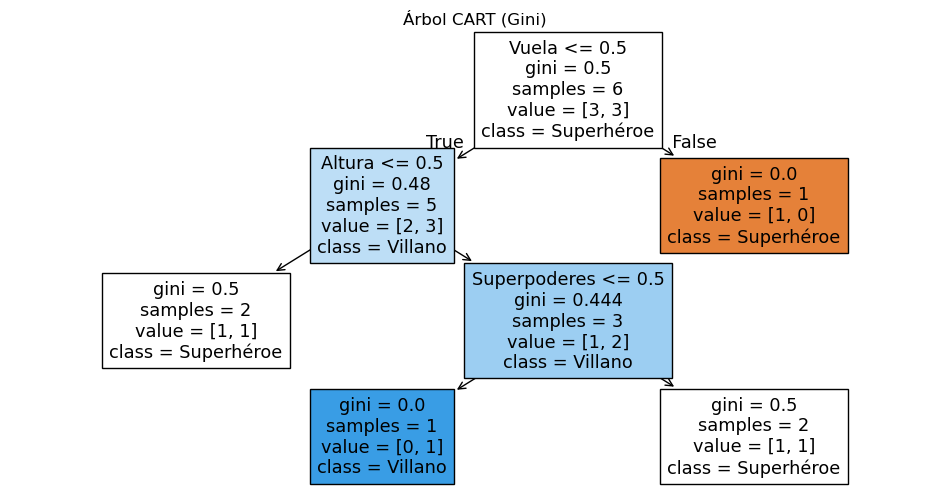

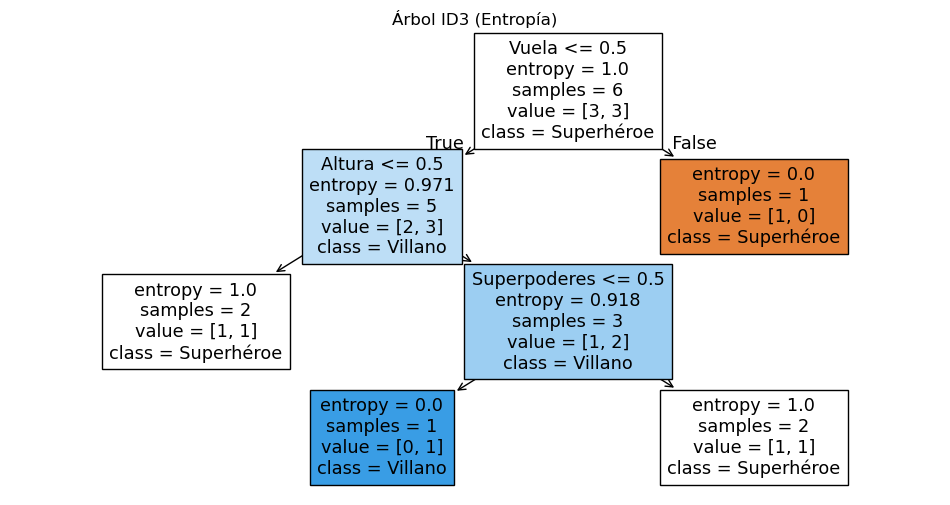

In [17]:
#Visualizar los arboles
plt.figure(figsize=(12, 6))
plot_tree(arbol_gini, feature_names=['Vuela', 'Superpoderes', 'Altura'], 
          class_names=['Superhéroe', 'Villano'], filled=True)
plt.title("Árbol CART (Gini)")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(arbol_entropia, feature_names=['Vuela', 'Superpoderes', 'Altura'], 
          class_names=['Superhéroe', 'Villano'], filled=True)
plt.title("Árbol ID3 (Entropía)")
plt.show()

2. ¿Debo llevar paraguas?
Problema: Predice si debes llevar paraguas usando ID3. 
Preguntas: Muestra la ganancia de información para cada atributo, ¿Qué atributo es más determinante?


In [19]:
data={
    'dia': ['lunes','martes','miercoles'],
    'nublado': ['si','no','si'],
    'humedad': ['alta','alta','normal'],
    'viento': ['no','si','no'],
    'llevarParaguas':['si','si','no']
}
df=pd.DataFrame(data)
df

,dia,nublado,humedad,viento,llevarParaguas
0,lunes,si,alta,no,si
1,martes,no,alta,si,si
2,miercoles,si,normal,no,no


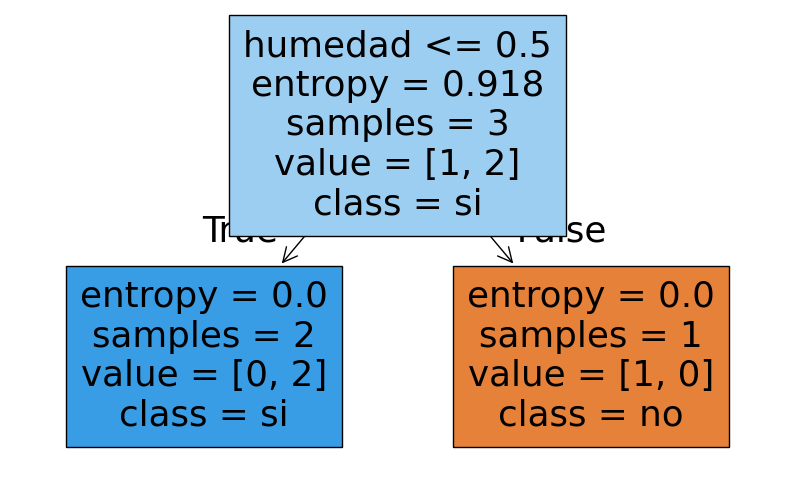

In [28]:
# Codificación de variables categóricas
le = LabelEncoder()
df_encoded = df.copy()
for col in df.columns[1:]:
    df_encoded[col] = le.fit_transform(df[col])

X = df_encoded[['nublado', 'humedad', 'viento']]
y = df_encoded['llevarParaguas']

# Árbol con entropía (ID3)
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=3)
arbol.fit(X, y)

plt.figure(figsize=(10,6))
plot_tree(arbol, feature_names=['nublado', 'humedad', 'viento'], 
          class_names=['no', 'si'], filled=True)
plt.show()

In [20]:
#Codificamos las variables categoricas
le=LabelEncoder()
df['nublado_c']=le.fit_transform(df['nublado'])
df['humedad_c']=le.fit_transform(df['humedad'])
df['viento_c']=le.fit_transform(df['viento'])
df['llevarParaguas_c']=le.fit_transform(df['llevarParaguas'])

In [23]:
df

,dia,nublado,humedad,viento,llevarParaguas,nublado_c,humedad_c,viento_c,llevarParaguas_c
0,lunes,si,alta,no,si,1,0,0,1
1,martes,no,alta,si,si,0,0,1,1
2,miercoles,si,normal,no,no,1,1,0,0


In [24]:
X1=df[['nublado_c','humedad_c','viento_c']]
y1=df['llevarParaguas_c']

In [25]:
arbol_e=DecisionTreeClassifier(criterion='entropy',random_state=42)
arbol_e.fit(X1,y1)

DecisionTreeClassifier(criterion='entropy', random_state=42)

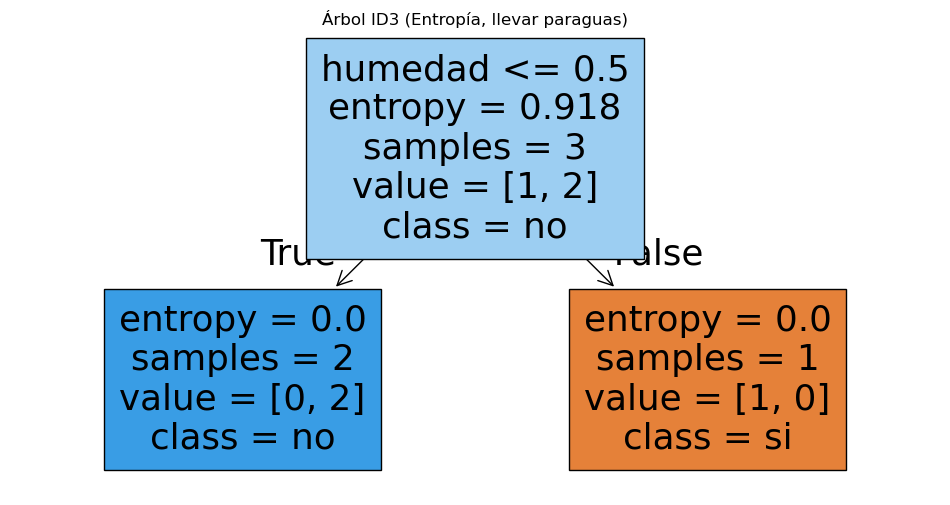

In [29]:
plt.figure(figsize=(12, 6))
plot_tree(arbol_e, feature_names=['nublado', 'humedad', 'viento'], 
          class_names=['si', 'no'], filled=True)
plt.title("Árbol ID3 (Entropía, llevar paraguas)")
plt.show()

3. ¿Aprobaré el examen?
Problema: Clasifica si un estudiante aprobará usando CART.
Preguntas: ¿Cuál es el Gini inicial? ,Dibuja el árbol hasta el segundo nivel.

In [31]:
data1={
    'Estudiante': ['Ana','Luis','Carlos'],
    'Estudio':['si','no','si'],
    'Dormido':['si','no','no'],
    'Cafe':['no','si','si'],
    'Aprobo':['si','no','si']
}
df1=pd.DataFrame(data1)
df1

,Estudiante,Estudio,Dormido,Cafe,Aprobo
0,Ana,si,si,no,si
1,Luis,no,no,si,no
2,Carlos,si,no,si,si


In [32]:
df_c=df1.copy()
for col in df1.columns[1:]:
    df_c[col]=le.fit_transform(df1[col])

In [33]:
X2=df_c[['Estudio','Dormido','Cafe']]
y2=df_c['Aprobo']

In [34]:
arbol_g=DecisionTreeClassifier(criterion='gini',random_state=42)
arbol_g.fit(X2,y2)

DecisionTreeClassifier(random_state=42)

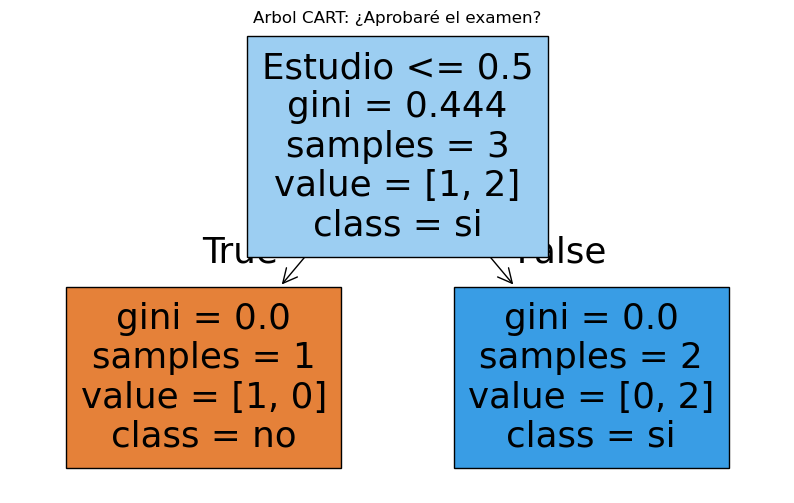

In [37]:
plt.figure(figsize=(10,6))
plot_tree(arbol_g,feature_names=['Estudio','Dormido','Cafe'],class_names=['no','si'],filled=True)
plt.title("Arbol CART: ¿Aprobaré el examen?")
plt.show()

4. ¿Es un perro peligroso?
Problema: Predice si un perro es peligroso con ID3.
Preguntas: ¿Cuál es la entropía del nodo raíz? , ¿Cómo afecta el atributo "Peludo" al árbol?

In [38]:
data2={
    'raza':['chihuahua','pitbull','labrador'],
    'tamaño':['pequeño','grande','grande'],
    'ladraMucho':['si','no','si'],
    'peludo': ['si','no','si'],
    'peligroso': ['no','si','no']
}
df2=pd.DataFrame(data2)
df2

,raza,tamaño,ladraMucho,peludo,peligroso
0,chihuahua,pequeño,si,si,no
1,pitbull,grande,no,no,si
2,labrador,grande,si,si,no


In [40]:
df_c2=df2.copy()
for col in df2.columns[1:]:
    df_c2[col]=le.fit_transform(df2[col])

In [41]:
X3=df_c2[['tamaño','ladraMucho','peludo']]
y3=df_c2['peligroso']

In [42]:
arbol_e2=DecisionTreeClassifier(criterion='entropy',random_state=42)
arbol_e2.fit(X3,y3)

DecisionTreeClassifier(criterion='entropy', random_state=42)

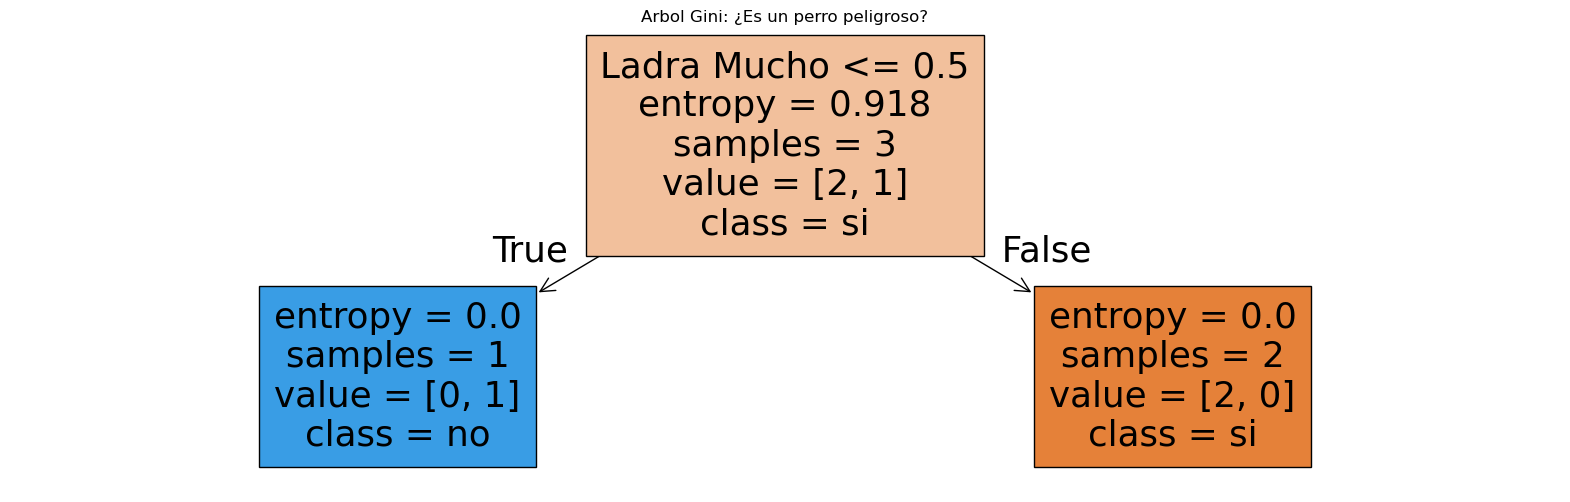

In [53]:
plt.figure(figsize=(20,6))
plot_tree(arbol_e2,feature_names=['Tamaño','Ladra Mucho','Peludo'],class_names=['si','no'],filled=True)
plt.title("Arbol Gini: ¿Es un perro peligroso?")
plt.show()

5. ¿Me gustará la película?
Problema: Clasifica si te gustará una película usando CART.
Preguntas: ¿Qué atributo tiene mayor importancia? ¿Cómo se divide el nodo para "Género = Animación"?


In [47]:
data3={
    'pelicula': ['inception','titanic','shrek'],
    'genero': ['ciencia','romance','animacion'],
    'directorFamoso':['si','si','no'],
    'duracion':['si','si','no'],
    'me_gusto':['si','no','si']
}
df3=pd.DataFrame(data3)

#Codificacion
df_c3=df3.copy()
for c in df3.columns[1:]:
    df_c3[c]=le.fit_transform(df3[c])
df_c3

,pelicula,genero,directorFamoso,duracion,me_gusto
0,inception,1,1,1,1
1,titanic,2,1,1,0
2,shrek,0,0,0,1


In [49]:
X4=df_c3[['genero','directorFamoso','duracion']]
y4=df_c3['me_gusto']

md=DecisionTreeClassifier(criterion='gini',random_state=42)
md.fit(X4,y4)

DecisionTreeClassifier(random_state=42)

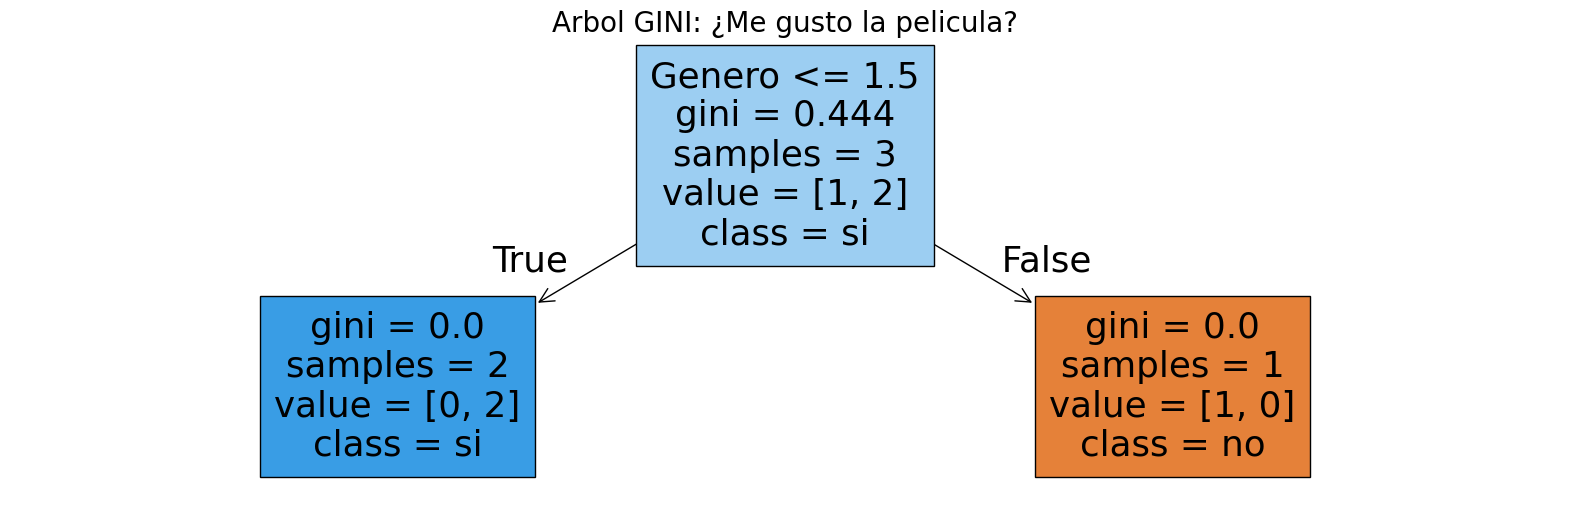

In [52]:
plt.figure(figsize=(20,6))
plot_tree(md,feature_names=['Genero','Director Famoso','Duracion'],class_names=['no','si'],filled=True)
plt.title("Arbol GINI: ¿Me gusto la pelicula?",fontsize=20)
plt.show()

6. ¿Es un buen día para surfear?
Problema: Predice si es buen día para surfear con ID3.
Preguntas: Calcula la ganancia de información para "OlasAltas". ¿Por qué "VientoFuerte" podría ser importante?

In [54]:
data4={
    'dia':[1,2,3],
    'olasAltas':['si','no','si'],
    'vientoFuerte':['no','si','si'],
    'temperatura':['alta','baja','alta'],
    'surfear':['si','no','no']
}
df4=pd.DataFrame(data4)

#Codificación
df_c4=df4.copy()
for c in df4.columns[1:]:
    df_c4[c]=le.fit_transform(df4[c])

In [55]:
X5=df_c4[['olasAltas','vientoFuerte','temperatura']]
y5=df_c4['surfear']

md1=DecisionTreeClassifier(criterion='entropy',random_state=42)
md1.fit(X5,y5)

DecisionTreeClassifier(criterion='entropy', random_state=42)

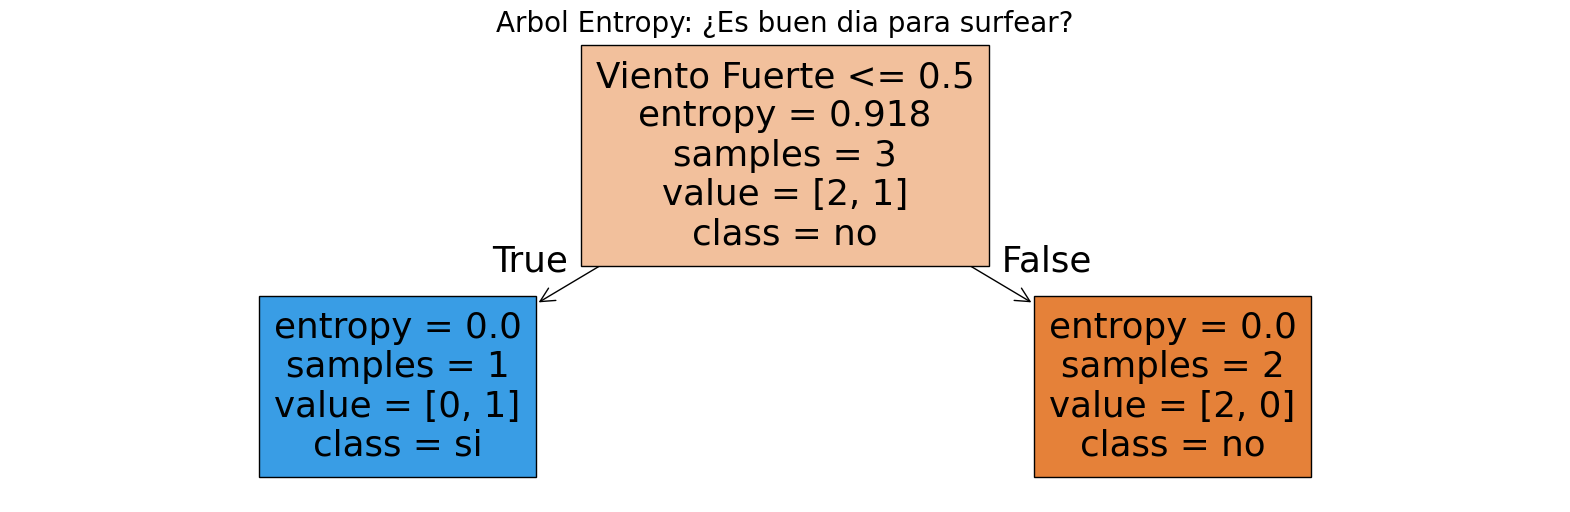

In [57]:
plt.figure(figsize=(20,6))
plot_tree(md1,feature_names=['Olas Altas','Viento Fuerte','Temperatura'],class_names=['no','si'],filled=True)
plt.title("Arbol Entropy: ¿Es buen dia para surfear?", fontsize=20)
plt.show()


7. ¿Ganará el partido?
Problema: Clasifica si tu equipo ganará usando CART.
Preguntas: ¿Cuál es el Gini para "Local = Sí"? , Si "RivalFuerte = Sí", ¿qué predice el árbol?

In [60]:
data5={
    "partido":[1,2,3],
    "local":["si","no","si"],
    "rivalFuerte":["no","si","si"],
    "jugadorEstrella":["si","no","si"],
    "gano":["si","no","si"]
}
df5 = pd.DataFrame(data5).drop("partido", axis=1)

In [61]:
# Codificación
le = LabelEncoder()
df5_encoded = df5.apply(le.fit_transform)

X6 = df5_encoded.drop("gano", axis=1)
y6 = df5_encoded["gano"]

# Entrenar modelo CART
cart_model = DecisionTreeClassifier(criterion='gini')
cart_model.fit(X6, y6)


DecisionTreeClassifier()

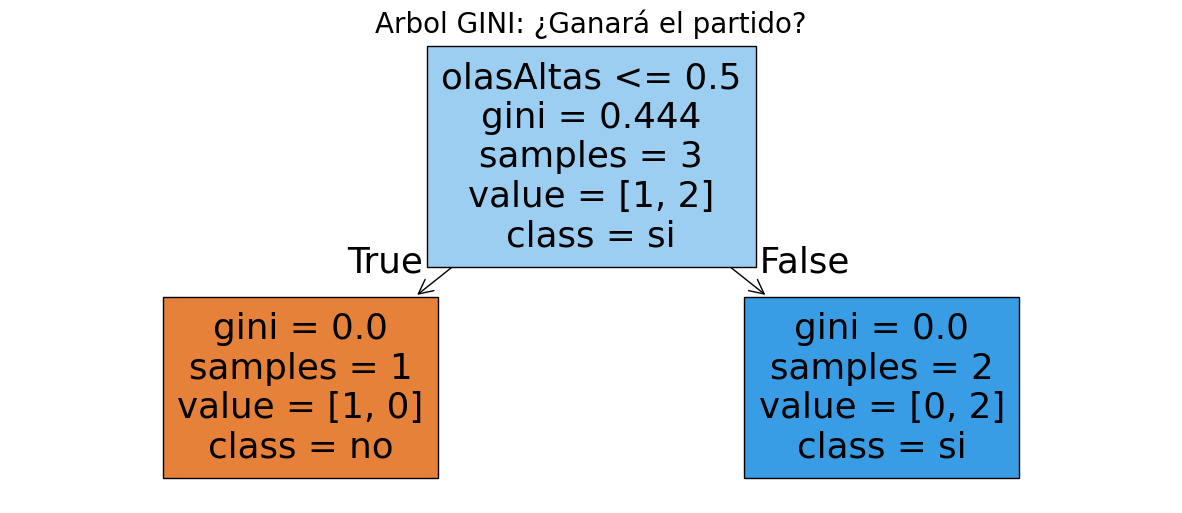

In [63]:
plt.figure(figsize=(15,6))
plot_tree(cart_model, feature_names=X5.columns, class_names=['no','si'], filled=True)
plt.title("Arbol GINI: ¿Ganará el partido?",fontsize=20)
plt.show()


8. ¿Es un buen candidato para un trabajo?
Problema: Predice si un candidato será contratado con ID3.
Preguntas: Calcula la ganancia de información para "Experiencia". ¿Qué atributo es redundante?

In [66]:
data6={
    'Candidato': ['A','B','C'],
    'Experiencia':['si','no','si'],
    'Titulado':['no','si','si'],
    'habilidadesBlandas':['si','no','si'],
    'contrato':['si','no','si']
}
df6=pd.DataFrame(data6).drop('Candidato',axis=1)

df_c6=df6.apply(le.fit_transform)

In [70]:
X8=df_c6.drop('contrato',axis=1)
y8=df_c6['contrato']


md2=DecisionTreeClassifier(criterion='entropy',random_state=42)
md2.fit(X8,y8)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
plt.figure(figsize=(15,6))
plot_tree(md2, feature_names=X5.columns, class_names=['no','si'], filled=True)
plt.title("Arbol ENTROPY: ¿Es un buen candidato para el trabajo?",fontsize=20)
plt.show()
